In [3]:
import pandas as pd


df = pd.read_csv('General_Education_School.csv')


df.head()


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7


In [4]:

print("Shape of the dataset:", df.shape)


print("Column names:", df.columns.tolist())

print(df.info())


df.describe()


Shape of the dataset: (1671, 10)
Column names: ['DBN', 'School Name', 'School Type', 'Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate', 'Total Safety and Respect Score', 'Total Communication Score', 'Total Engagement Score', 'Total Academic Expectations Score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DBN                                1671 non-null   object
 1   School Name                        1671 non-null   object
 2   School Type                        1670 non-null   object
 3   Parent Response Rate               1671 non-null   object
 4   Teacher Response Rate              1671 non-null   object
 5   Student Response Rate              996 non-null    object
 6   Total Safety and Respect Score     1671 non-null   object
 7   Total Communication Score          1

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1671,1671,1670,1671,1671,996,1671,1671,1671,1671
unique,1668,1666,9,101,84,75,45,43,41,40
top,84M483,New York French American Charter School,Elementary School,100%,100%,99%,8.3,7.4,7.6,7.7
freq,2,2,617,45,334,61,98,101,102,115


In [5]:

print("Number of unique schools:", df['School Name'].nunique())

print("School types:", df['School Type'].unique())

print("School type counts:\n", df['School Type'].value_counts())


Number of unique schools: 1666
School types: [nan 'Elementary School' 'Elementary/Middle School' 'Middle/High School'
 'Middle School' 'High School' 'Transfer High School'
 'Elementary/Middle/High School' 'Early Childhood School' 'YABC']
School type counts:
 School Type
Elementary School                617
High School                      352
Middle School                    293
Elementary/Middle School         160
Middle/High School                87
Early Childhood School            83
Transfer High School              49
YABC                              22
Elementary/Middle/High School      7
Name: count, dtype: int64


In [6]:

percent_columns = ['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']

for col in percent_columns:
    df[col] = df[col].str.replace('%', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ثانيًا تحويل التقييمات إلى float
score_columns = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # التعامل مع أي قيم غير قابلة للتحويل


In [7]:
print(df.dtypes)


DBN                                   object
School Name                           object
School Type                           object
Parent Response Rate                 float64
Teacher Response Rate                float64
Student Response Rate                float64
Total Safety and Respect Score       float64
Total Communication Score            float64
Total Engagement Score               float64
Total Academic Expectations Score    float64
dtype: object


In [8]:
print(df.isnull().sum())


DBN                                    0
School Name                            0
School Type                            1
Parent Response Rate                   1
Teacher Response Rate                  1
Student Response Rate                676
Total Safety and Respect Score         1
Total Communication Score              1
Total Engagement Score                 1
Total Academic Expectations Score      1
dtype: int64


In [9]:
df = df.dropna(subset=['School Type'])


In [10]:

df['Student Response Rate'] = df['Student Response Rate'].fillna(df['Student Response Rate'].mean())


<ipython-input-10-92a9a0c3cd91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Student Response Rate'] = df['Student Response Rate'].fillna(df['Student Response Rate'].mean())


In [11]:
print(df.isnull().sum())


DBN                                  0
School Name                          0
School Type                          0
Parent Response Rate                 0
Teacher Response Rate                0
Student Response Rate                0
Total Safety and Respect Score       0
Total Communication Score            0
Total Engagement Score               0
Total Academic Expectations Score    0
dtype: int64


In [12]:
print("Average response rates:")
print("Parent: ", round(df['Parent Response Rate'].mean(), 2))
print("Student:", round(df['Student Response Rate'].mean(), 2))
print("Teacher:", round(df['Teacher Response Rate'].mean(), 2))

Average response rates:
Parent:  56.37
Student: 84.54
Teacher: 83.41


In [13]:
print("Correlation with Safety and Respect Score:", df['Parent Response Rate'].corr(df['Total Safety and Respect Score']))
print("Correlation with Communication Score:", df['Parent Response Rate'].corr(df['Total Communication Score']))


Correlation with Safety and Respect Score: 0.4992279789664057
Correlation with Communication Score: 0.4767362218070809


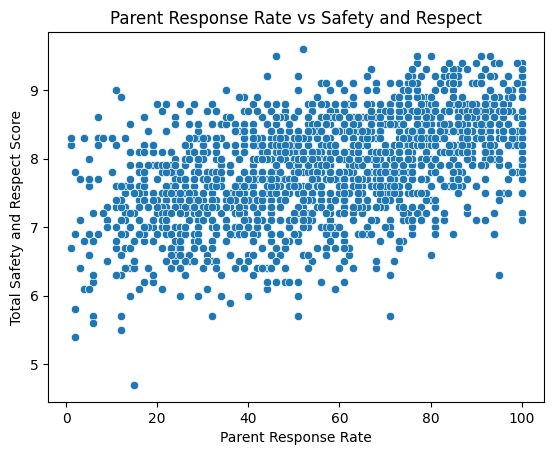

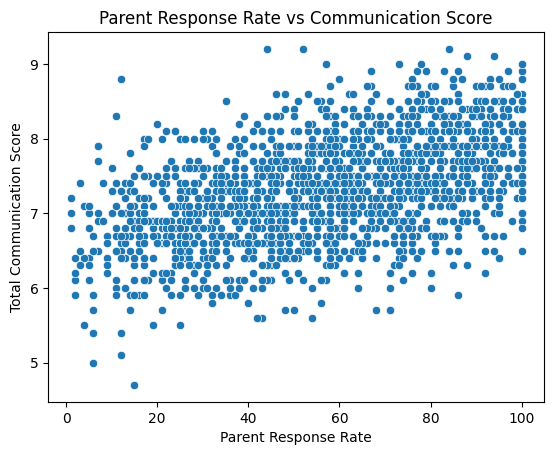

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='Parent Response Rate', y='Total Safety and Respect Score', data=df)
plt.title('Parent Response Rate vs Safety and Respect')
plt.show()

sns.scatterplot(x='Parent Response Rate', y='Total Communication Score', data=df)
plt.title('Parent Response Rate vs Communication Score')
plt.show()


In [15]:

school_types_avg = df.groupby('School Type')[
    ['Total Safety and Respect Score',
     'Total Communication Score',
     'Total Engagement Score',
     'Total Academic Expectations Score']
].mean().round(2)

print(school_types_avg)


                               Total Safety and Respect Score  \
School Type                                                     
Early Childhood School                                   8.62   
Elementary School                                        8.27   
Elementary/Middle School                                 7.66   
Elementary/Middle/High School                            7.47   
High School                                              7.39   
Middle School                                            7.46   
Middle/High School                                       7.40   
Transfer High School                                     8.09   
YABC                                                     8.38   

                               Total Communication Score  \
School Type                                                
Early Childhood School                              8.00   
Elementary School                                   7.65   
Elementary/Middle School                    

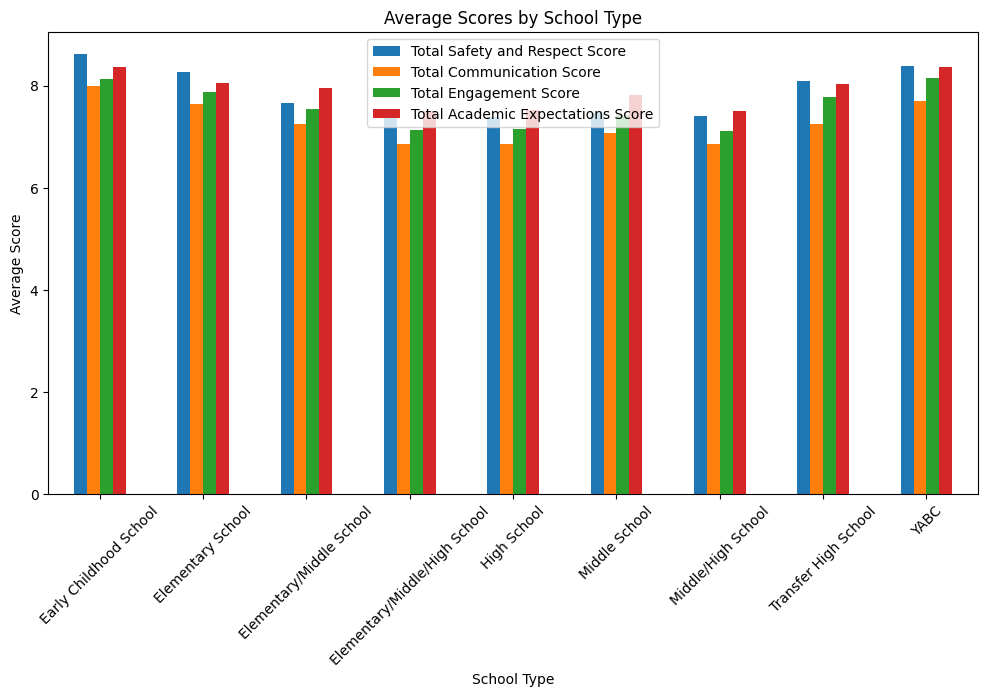

In [16]:
school_types_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Scores by School Type')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


In [17]:

top_safety = df.sort_values(by='Total Safety and Respect Score', ascending=False).head(5)
print("Top 5 Schools by Safety:\n", top_safety[['School Name', 'Total Safety and Respect Score']])

low_safety = df.sort_values(by='Total Safety and Respect Score', ascending=True).head(5)
print("Lowest 5 Schools by Safety:\n", low_safety[['School Name', 'Total Safety and Respect Score']])


Top 5 Schools by Safety:
                                       School Name  \
1399                                     P.S. 078   
496                                      P.S. 209   
1331  The Academy For Excellence Through The Arts   
1439                            P.S. 005 Huguenot   
1525         All City Leadership Secondary School   

      Total Safety and Respect Score  
1399                             9.6  
496                              9.5  
1331                             9.5  
1439                             9.5  
1525                             9.5  
Lowest 5 Schools by Safety:
                                             School Name  \
830              The Brooklyn Academy Of Global Finance   
1513      I.S. 296 - The Anna Gonzalez Community School   
243   Academy For Social Action: A College Board School   
1295                          Beach Channel High School   
1051                             J.H.S. 078 Roy H. Mann   

      Total Safety and Respect Score 